# Build a classification model to predict whether a student passes or fails based on study hours, attendance, and CGPA.

Classify Students as Pass/Fail
Create a new column:
• If Final_Score >= 40 → Pass
• Else → Fail


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
import pandas as pd

df = pd.read_csv('student_dataset.csv')
print(df.head())

   Student_ID  Age  Gender  Hours_Studied  Attendance_Rate  Previous_Sem_CGPA  \
0           1   24  Female            3.6             55.1               7.58   
1           2   21  Female            6.2             83.2               6.61   
2           3   22    Male            2.2             50.3               8.98   
3           4   24  Female            1.1             58.0               6.35   
4           5   20    Male            2.7             77.4               7.19   

   Family_Income Part_Time_Job  Final_Score  
0          67280           Yes         94.2  
1          99459            No         88.5  
2          36779            No         96.7  
3          83932            No         82.2  
4          92936            No         74.9  


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student_ID         100 non-null    int64  
 1   Age                100 non-null    int64  
 2   Gender             100 non-null    object 
 3   Hours_Studied      100 non-null    float64
 4   Attendance_Rate    100 non-null    float64
 5   Previous_Sem_CGPA  100 non-null    float64
 6   Family_Income      100 non-null    int64  
 7   Part_Time_Job      100 non-null    object 
 8   Final_Score        100 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 7.2+ KB


In [11]:
df.describe()

,Student_ID,Age,Hours_Studied,Attendance_Rate,Previous_Sem_CGPA,Family_Income,Final_Score
count,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,50.500000,21.210000,4.214000,76.41500,7.459900,81902.370000,67.907000
std,29.011492,1.913773,2.224293,14.43588,1.477141,35735.329886,19.655468
min,1.000000,18.000000,0.600000,50.30000,5.070000,21062.000000,35.900000
25%,25.750000,19.750000,2.300000,64.60000,6.247500,48019.250000,49.625000
50%,50.500000,21.000000,4.300000,78.10000,7.490000,81888.500000,67.000000
75%,75.250000,23.000000,6.225000,87.60000,8.750000,109449.250000,86.350000
max,100.000000,24.000000,7.900000,99.50000,9.950000,146174.000000,100.000000


In [12]:
df.isnull().mean()

Student_ID           0.0
Age                  0.0
Gender               0.0
Hours_Studied        0.0
Attendance_Rate      0.0
Previous_Sem_CGPA    0.0
Family_Income        0.0
Part_Time_Job        0.0
Final_Score          0.0
dtype: float64

In [13]:
df.isnull().sum()


Student_ID           0
Age                  0
Gender               0
Hours_Studied        0
Attendance_Rate      0
Previous_Sem_CGPA    0
Family_Income        0
Part_Time_Job        0
Final_Score          0
dtype: int64

Create a new column:
• If Final_Score >= 40 → Pass
• Else → Fail

In [14]:
import pandas as pd

# Assuming you've already loaded your CSV into a DataFrame
df = pd.read_csv('student_dataset.csv')

# Create the Pass/Fail column based on Final_Score
df['Result'] = df['Final_Score'].apply(lambda score: 'Pass' if score >= 40 else 'Fail')

# Preview the updated DataFrame
print(df[['Student_ID', 'Final_Score', 'Result']].head())


   Student_ID  Final_Score Result
0           1         94.2   Pass
1           2         88.5   Pass
2           3         96.7   Pass
3           4         82.2   Pass
4           5         74.9   Pass


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

### Step 1: Load the dataset

In [ ]:

df = pd.read_csv('student_dataset.csv')
print(df.head())

   Student_ID  Age  Gender  Hours_Studied  Attendance_Rate  Previous_Sem_CGPA  \
0           1   24  Female            3.6             55.1               7.58   
1           2   21  Female            6.2             83.2               6.61   
2           3   22    Male            2.2             50.3               8.98   
3           4   24  Female            1.1             58.0               6.35   
4           5   20    Male            2.7             77.4               7.19   

   Family_Income Part_Time_Job  Final_Score  
0          67280           Yes         94.2  
1          99459            No         88.5  
2          36779            No         96.7  
3          83932            No         82.2  
4          92936            No         74.9  


### Step 2: Create 'Result' column (Pass/Fail)

In [ ]:

df['Result'] = df['Final_Score'].apply(lambda x: 'Pass' if x >= 40 else 'Fail')

### Step 3: Select features and target

In [ ]:

features = df[['Hours_Studied', 'Attendance_Rate', 'Previous_Sem_CGPA']]
target = df['Result']

### Step 4: Encode target labels (Pass = 1, Fail = 0)

In [ ]:

target_encoded = target.map({'Pass': 1, 'Fail': 0})

### Step 5: Split data

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2, random_state=42)

### Step 6: Train Logistic Regression model

In [ ]:

model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### Step 7: Predict and evaluate

In [ ]:

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.90


### Step 8: Plot confusion matrix

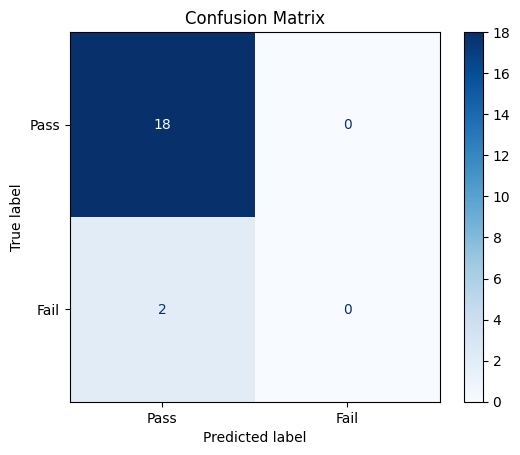

In [ ]:

cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Pass', 'Fail'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()